In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

def rmse_function_prophet(df):
    df['ds'] = pd.to_datetime(df['ds'])
    df['hour'] = df['ds'].dt.hour
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['yhat'])**2))
        rmse_adjusted = np.sqrt(np.mean((group['y'] - group['adjusted_y'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
            'RMSE_adjusted_y': rmse_adjusted
        })
    return pd.DataFrame(results)

def rmse_function_rnn(df):
    df['ds'] = pd.to_datetime(df['ds'])
    df['hour'] = df['ds'].dt.hour
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['y_hat'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
        })
    return pd.DataFrame(results)

def rmse_function_rnn2(df):
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['y_hat'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
        })
    return pd.DataFrame(results)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## AEP results

In [2]:
out_dir = 'AEP_results'

In [3]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_rnn_hybrid.csv')
rmse_rnn1 = rmse_function_rnn(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_yearly.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_hierarchical.csv')
rmse_rnn3 = rmse_function_rnn2(result3)

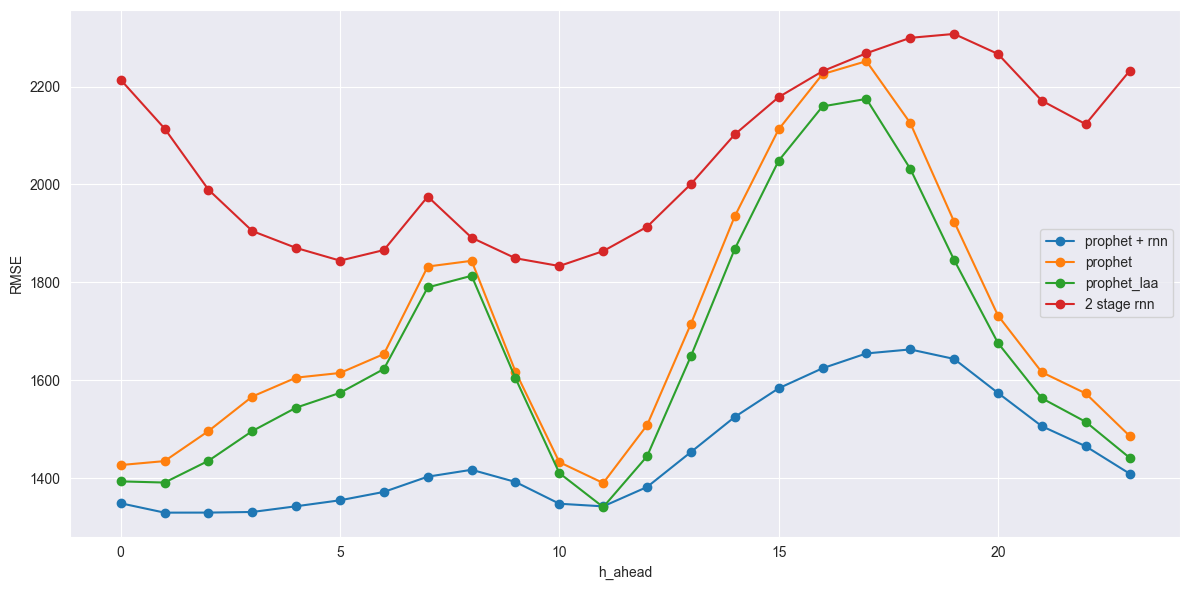

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet + rnn', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='2 stage rnn', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/yearly_aep.png')
plt.show()

## Comed results

In [5]:
out_dir = 'Comed_results'

In [6]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_rnn_hybrid.csv')
rmse_rnn1 = rmse_function_rnn(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_yearly.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_hierarchical.csv')
rmse_rnn3 = rmse_function_rnn2(result3)

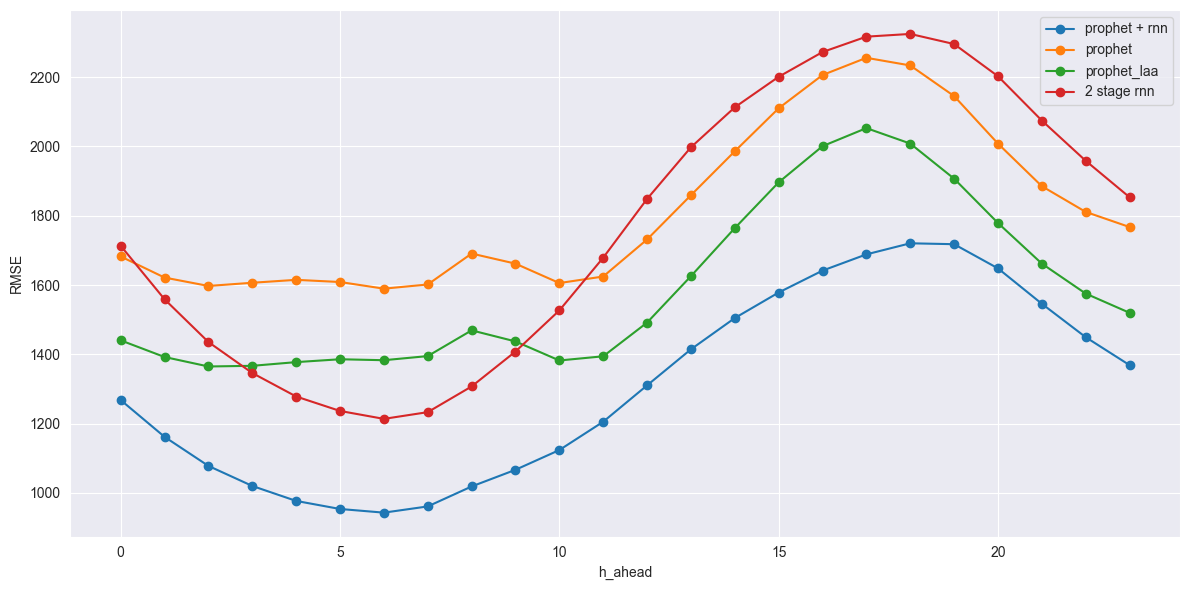

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet + rnn', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='2 stage rnn', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/yearly_comed.png')
plt.show()

## Dayton Result

In [8]:
out_dir = 'Dayton_results'

In [9]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_rnn_hybrid.csv')
rmse_rnn1 = rmse_function_rnn(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_yearly.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_hierarchical.csv')
rmse_rnn3 = rmse_function_rnn2(result3)

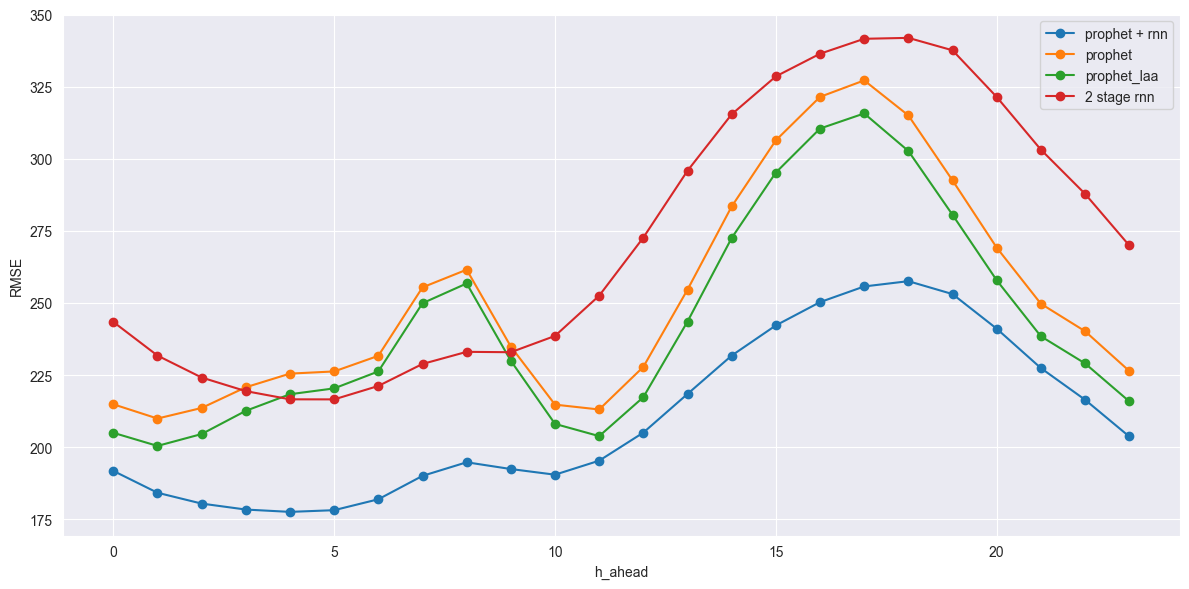

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet + rnn', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='2 stage rnn', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/yearly_dayton.png')
plt.show()

## Deok Result

In [11]:
out_dir = 'Deok_results'

In [12]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_rnn_hybrid.csv')
rmse_rnn1 = rmse_function_rnn(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_yearly.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_hierarchical.csv')
rmse_rnn3 = rmse_function_rnn2(result3)

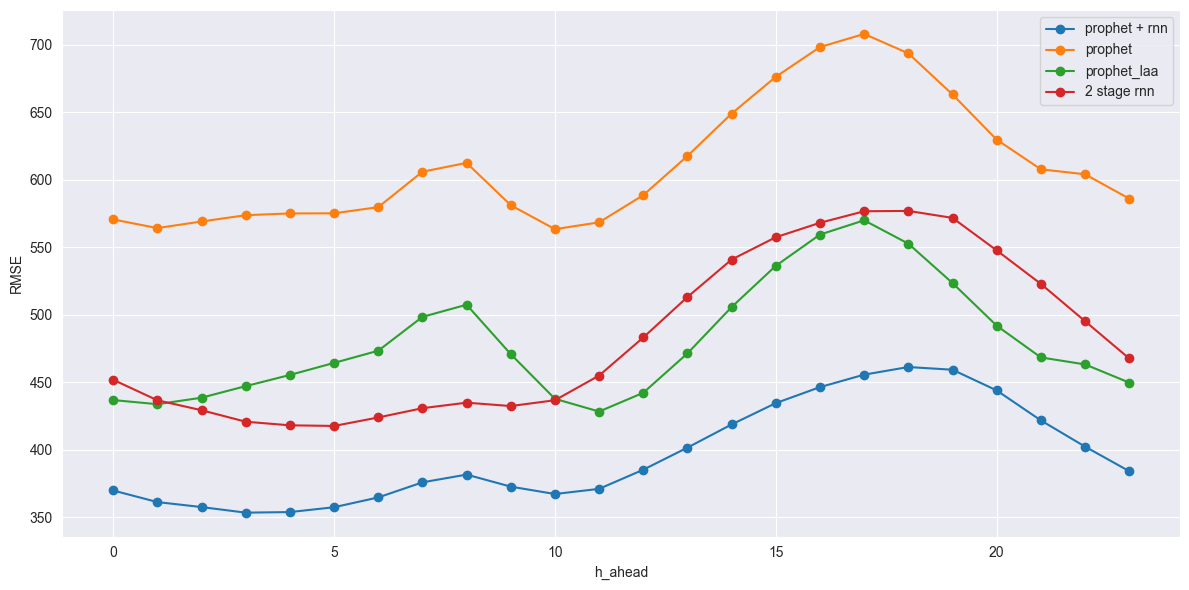

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet + rnn', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='2 stage rnn', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/yearly_deok.png')
plt.show()